In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/smoke.zip

Archive:  drive/MyDrive/smoke.zip
  inflating: smoke_detection_iot.csv  


In [ ]:
from IPython.display import Image

In [ ]:
Image(url='https://safetyandsecurityafrica.com/wp-content/uploads/2022/02/ionization-smoke-detectors.jpg',width=600,height=400)

In [ ]:
!pip install -q ptitprince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 KB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -q ptitprince
import ptitprince as pt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("../content/smoke_detection_iot.csv",index_col=0)

In [ ]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "blue","color":"yellow","border": "1.5px #000000"})

Shape Of The Dataset : (62630, 15)

Glimpse Of The Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,1654733332,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
2,1654733333,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
3,1654733334,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0
4,1654733335,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0


In [ ]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB
None


In [ ]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "blue","color":"yellow","border": "1.5px #000"})

Summary Of The Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1654792066.184273,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,110002.488078,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1654712187.000000,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1654743244.250000,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1654761919.500000,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1654777576.750000,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1655130051.000000,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [ ]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 62630 entries in this dataset.
After removing duplicate entries there are 62630 entries in this dataset.


In [ ]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "blue","color":"yellow","border": "1.5px #000"})

Null values of the Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data["Fire Alarm"].replace({0:"No", 1:"Yes"}, inplace = True)
data.rename(columns={"Temperature[C]": "Temperature","Humidity[%]": "Humidity","TVOC[ppb]":"TVOC","eCO2[ppm]":"eCO2","Pressure[hPa]":"Pressure"}, inplace = True)
data = data[["Temperature","Humidity","TVOC","eCO2","Raw H2","Raw Ethanol","Pressure","PM1.0","PM2.5","NC0.5","NC1.0","NC2.5","Fire Alarm"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "blue","color":"yellow","border": "1.5px #000"})

After preprocessing, let's have a glimpse of the final dataset :


,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,No
1,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No
2,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,No
3,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,No
4,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No


In [ ]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "blue","color":"yellow","border": "1.5px #000"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Temperature,62630.000000,15.970424,14.359576,-22.010000,10.994250,20.130000,25.409500,59.930000
Humidity,62630.000000,48.539499,8.865367,10.740000,47.530000,50.150000,53.240000,75.200000
TVOC,62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
eCO2,62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Pressure,62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
PM1.0,62630.000000,100.594309,922.524245,0.000000,1.280000,1.810000,2.090000,14333.690000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000


In [ ]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#7699D4", "figure.facecolor":"#7699D4",
            "axes.grid":True, "grid.color":"white", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#e9bb93", "legend.frameon": True, "legend.edgecolor":"black"})
sns.set_context("poster",font_scale = .7)

palette = ["#272716","#6c2411","#ae0d13","#cc3f18","#db6400"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

Let's have a look on the distribution of temperature :


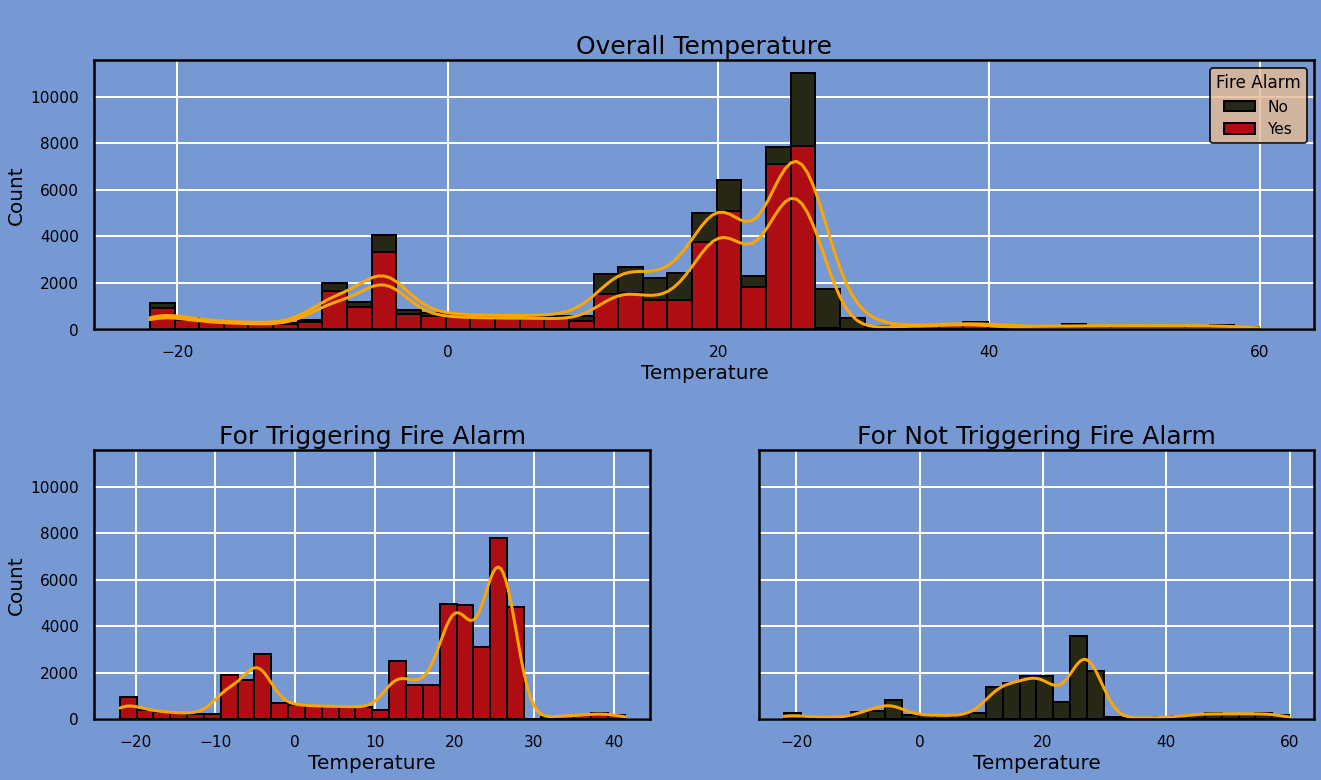

In [ ]:
print(f"Let's have a look on the distribution of temperature :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Temperature",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Temperature",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Temperature",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Temperature",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Temperature",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Temperature",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Temperature",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise temperature analysis :


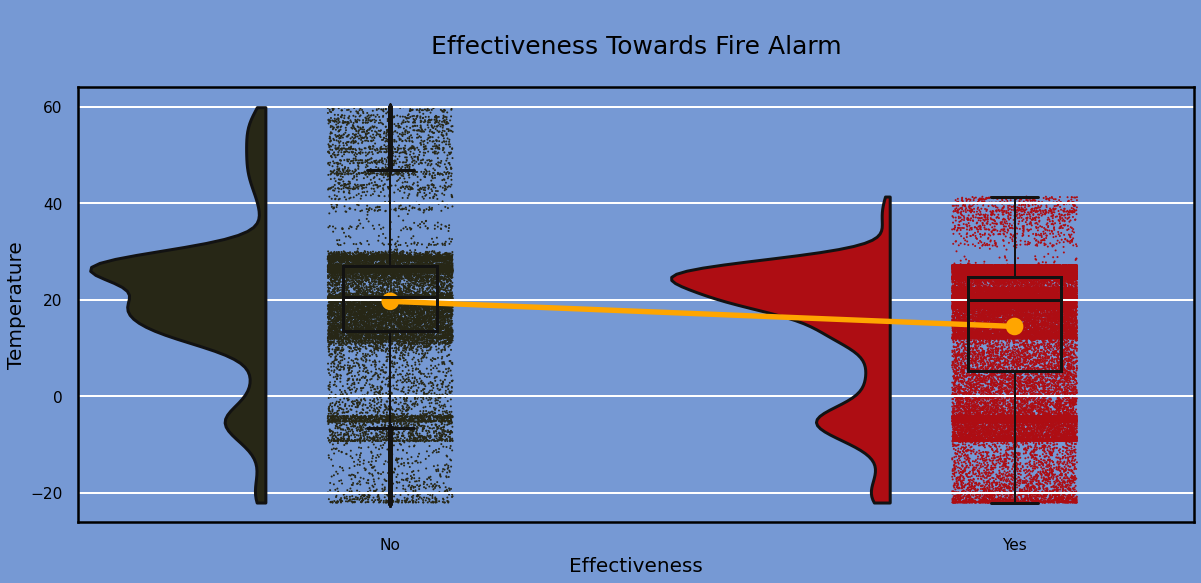

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise temperature analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Temperature"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Temperature",fontsize=20)

plt.show()

Let's have a look on the distribution of humidity :


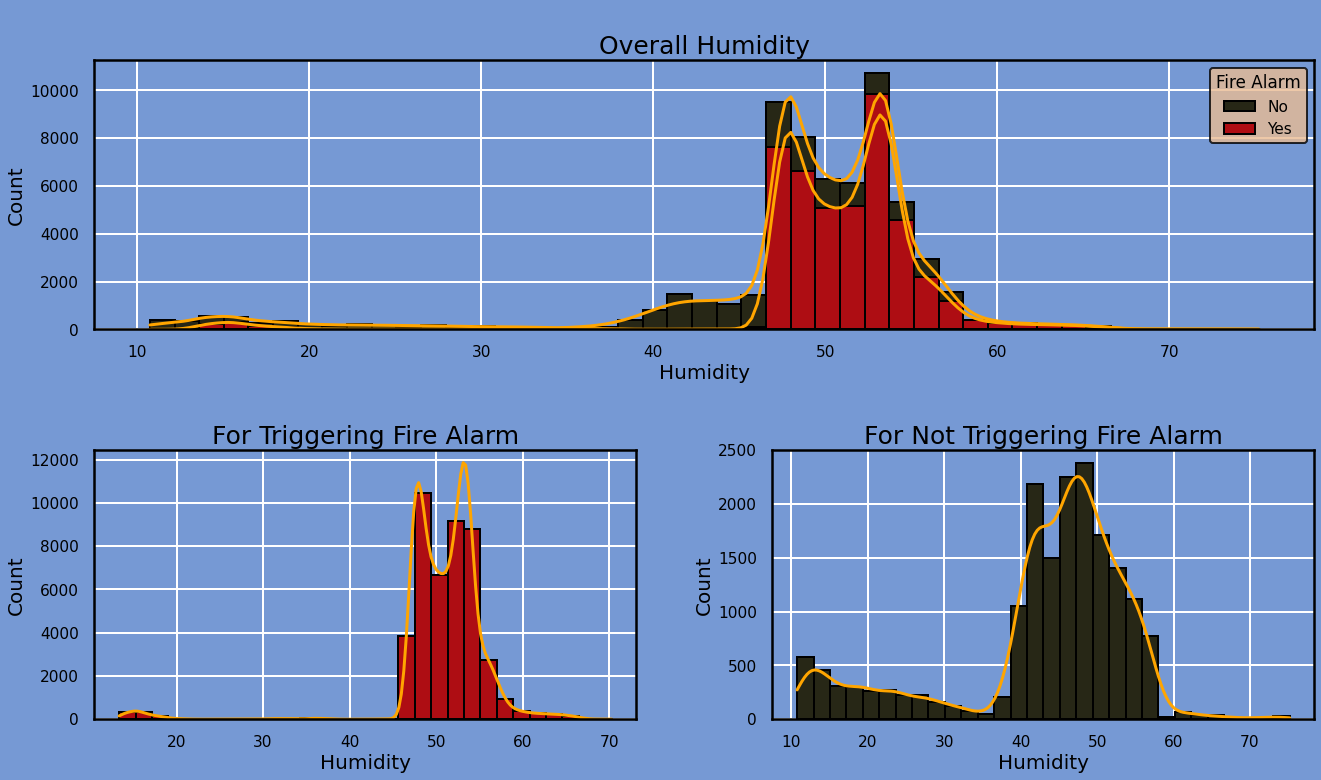

In [ ]:
print(f"Let's have a look on the distribution of humidity :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Humidity",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Humidity",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Humidity",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Humidity",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Humidity",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Humidity",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Humidity",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise humidity analysis :


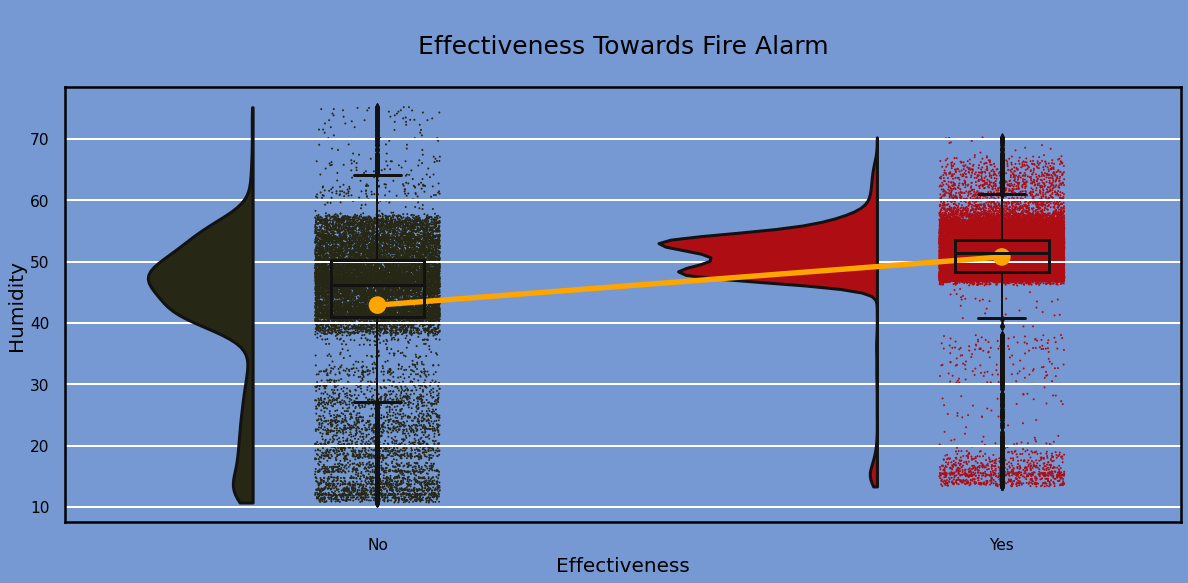

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise humidity analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Humidity"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Humidity",fontsize=20)

plt.show()

Let's have a look on the distribution of total volatile organic compounds :


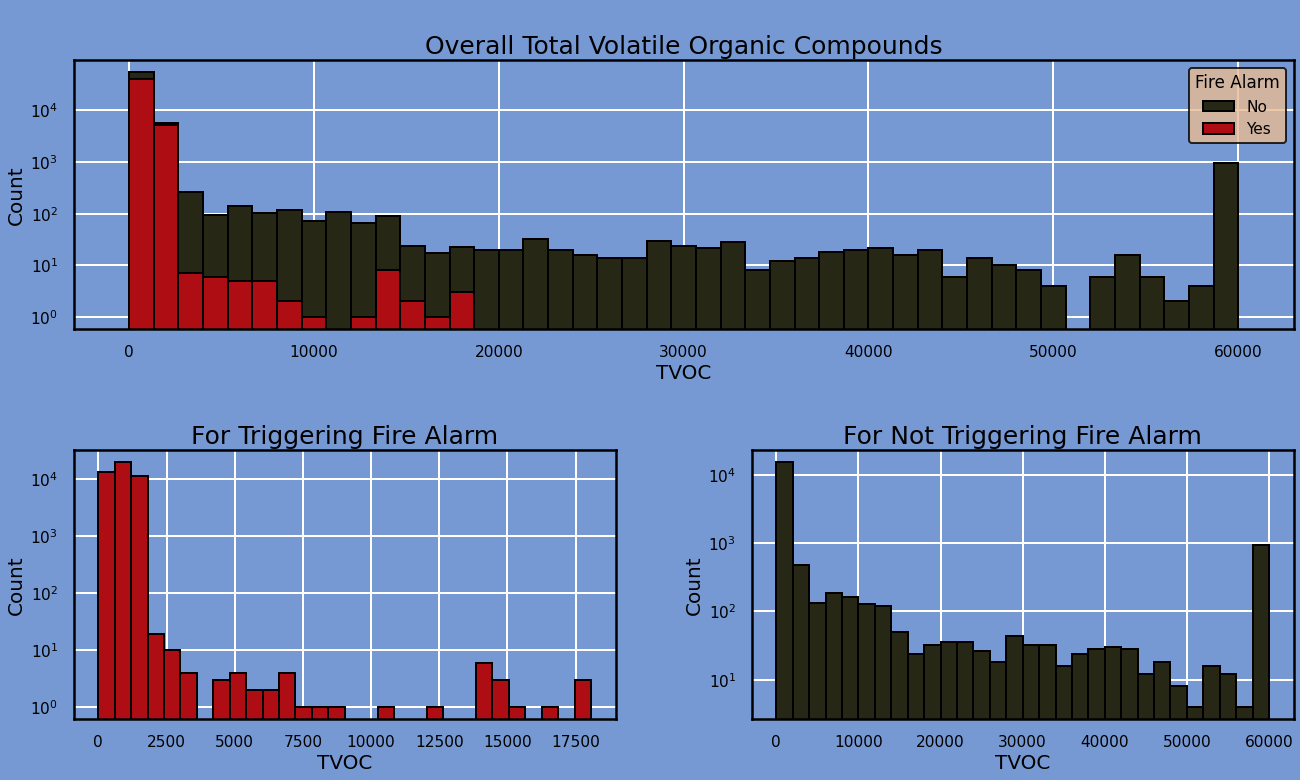

In [ ]:
print(f"Let's have a look on the distribution of total volatile organic compounds :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="TVOC",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Total Volatile Organic Compounds",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("TVOC",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="TVOC",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("TVOC",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="TVOC",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("TVOC",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :


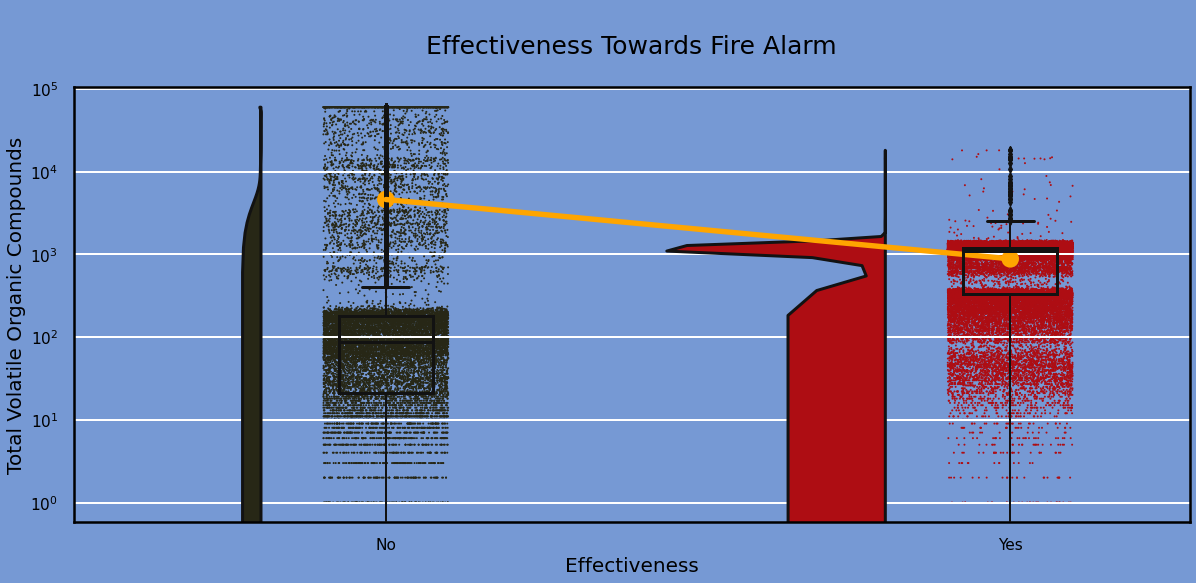

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["TVOC"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Total Volatile Organic Compounds",fontsize=20)
p.axes.set_yscale("log")

plt.show()

Let's have a look on the distribution of CO2 equivalent concentration :


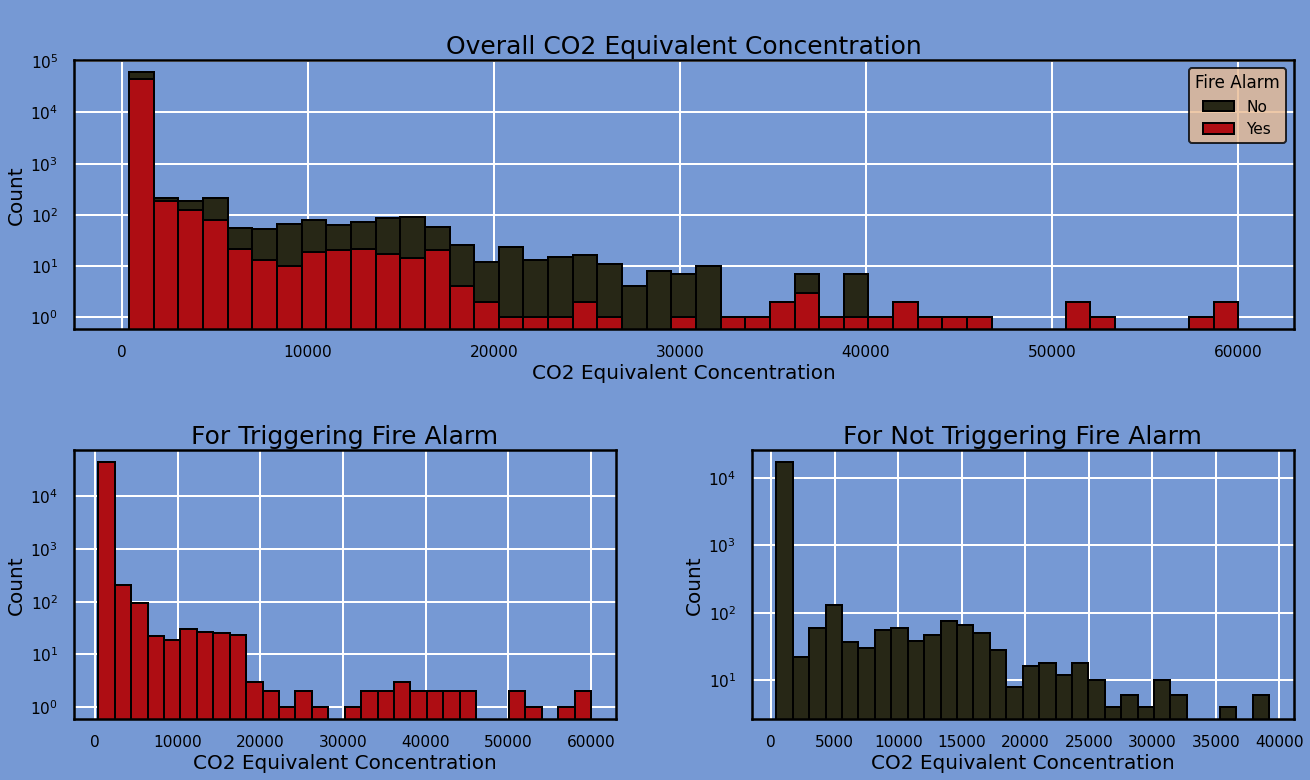

In [ ]:
print(f"Let's have a look on the distribution of CO2 equivalent concentration :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="eCO2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall CO2 Equivalent Concentration",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="eCO2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="eCO2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :


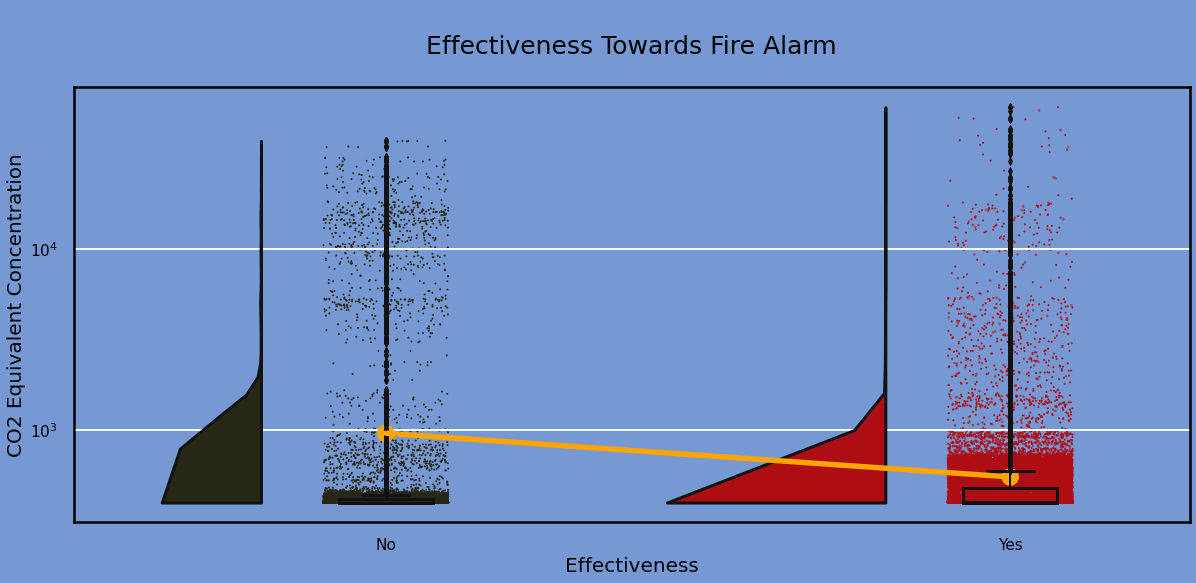

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["eCO2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("CO2 Equivalent Concentration",fontsize=20)
p.axes.set_yscale("log")

plt.show()

Let's have a look on the distribution of raw hydrogen :


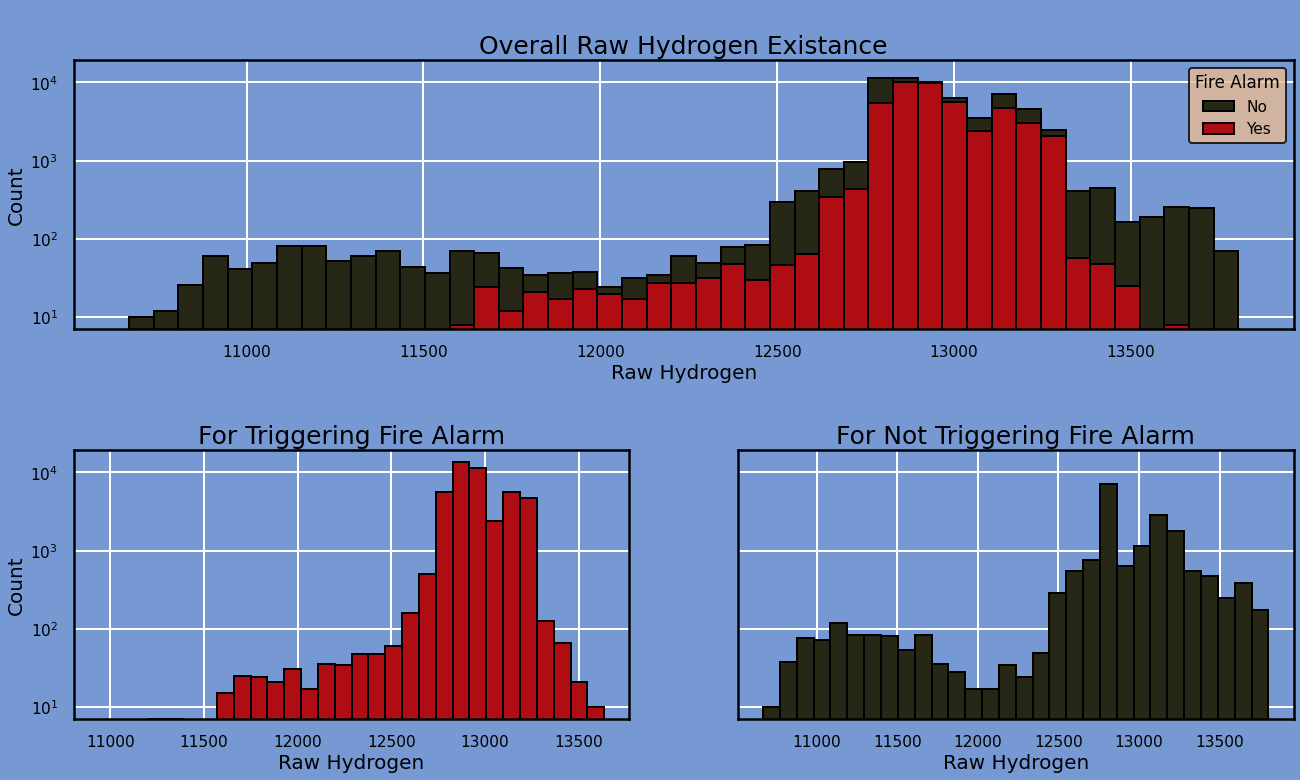

In [ ]:
print(f"Let's have a look on the distribution of raw hydrogen :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw H2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Hydrogen Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw H2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw H2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :


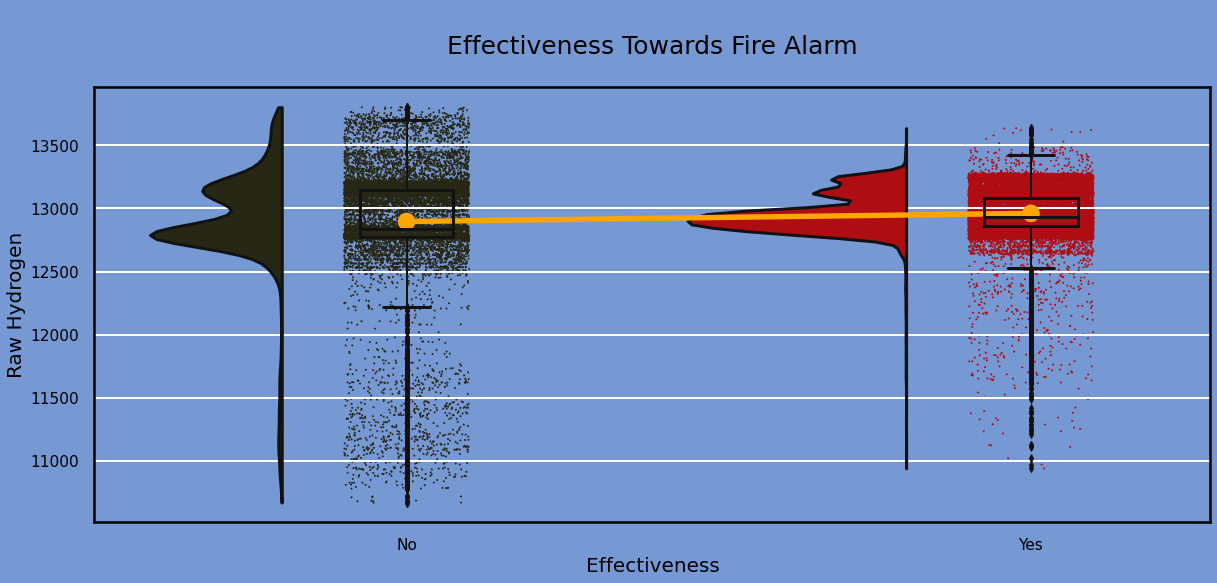

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw H2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Hydrogen",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of raw ethanol :


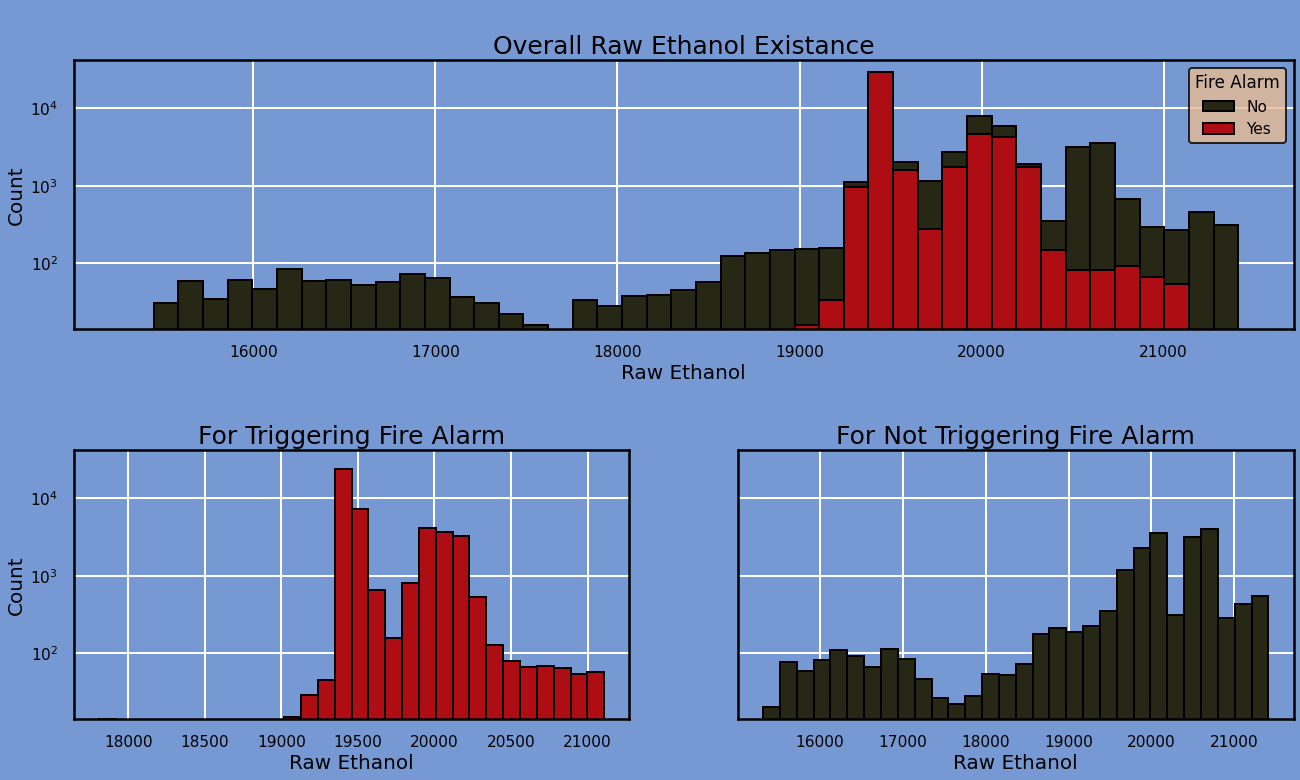

In [ ]:
print(f"Let's have a look on the distribution of raw ethanol :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw Ethanol",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Ethanol Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Ethanol",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw Ethanol",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Ethanol",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw Ethanol",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Ethanol",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :


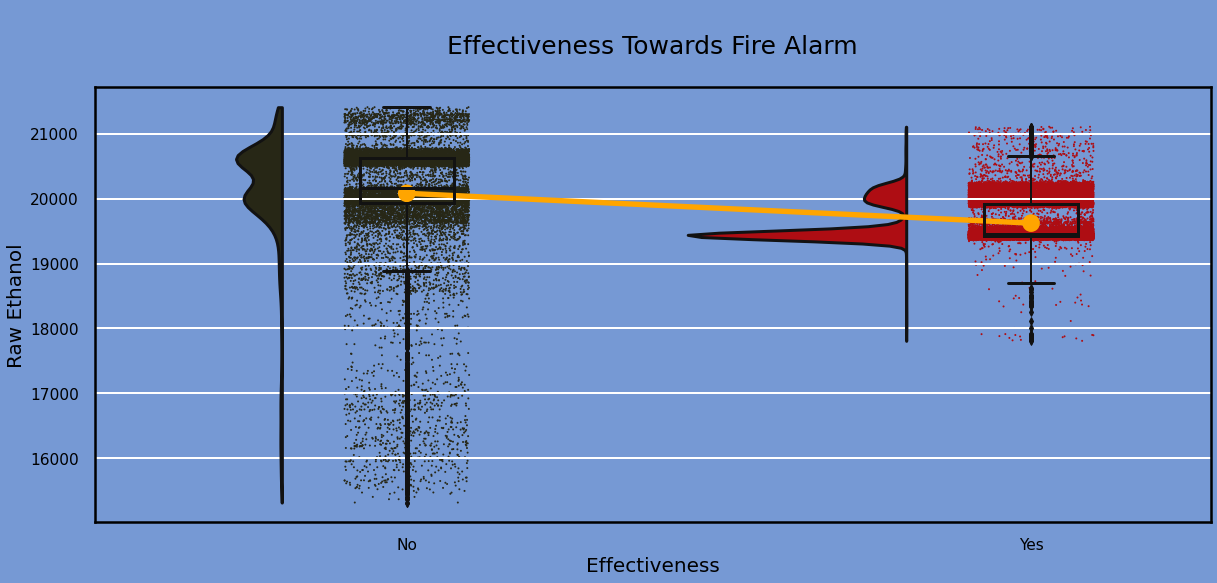

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw Ethanol"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Ethanol",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of air pressure :


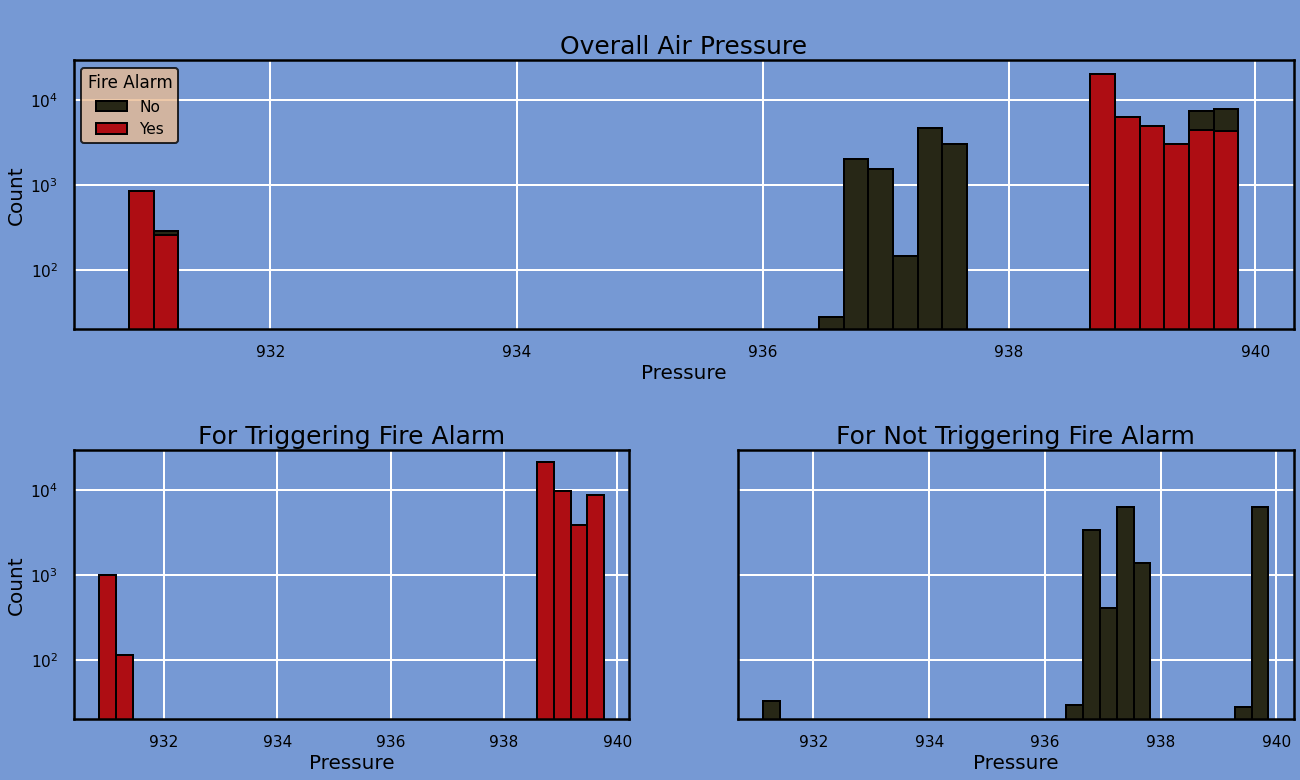

In [ ]:
print(f"Let's have a look on the distribution of air pressure :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Pressure",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Air Pressure",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Pressure",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Pressure",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Pressure",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Pressure",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Pressure",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise air pressure :


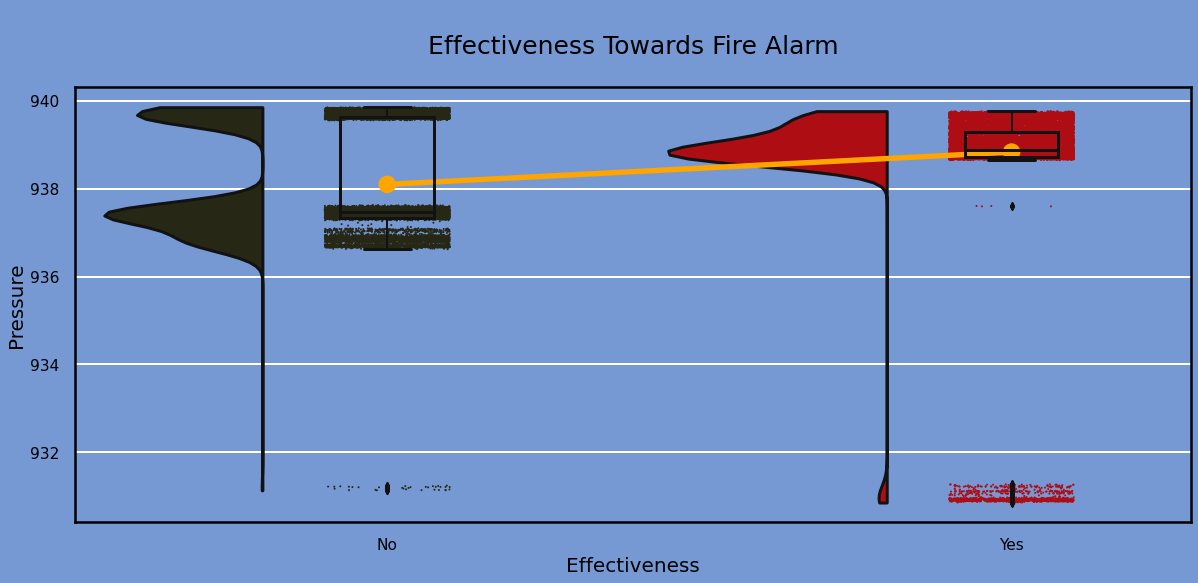

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise air pressure :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Pressure"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Pressure",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of particulate matter values :


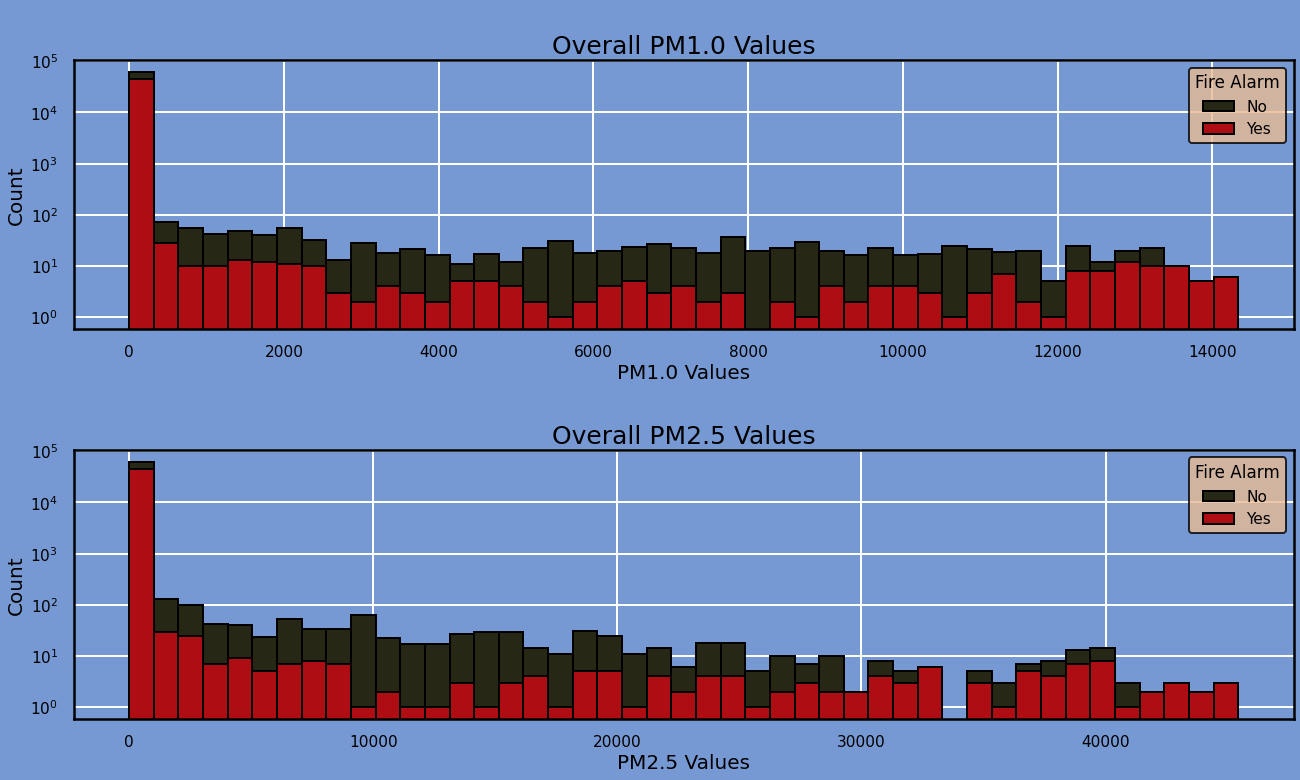

In [ ]:
print(f"Let's have a look on the distribution of particulate matter values :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="PM1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall PM1.0 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("PM1.0 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="PM2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall PM2.5 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("PM2.5 Values",fontsize=20)
axs[1].set_yscale("log")

plt.show()

Let's have a look on the distribution of the concentration of particulate matter values :


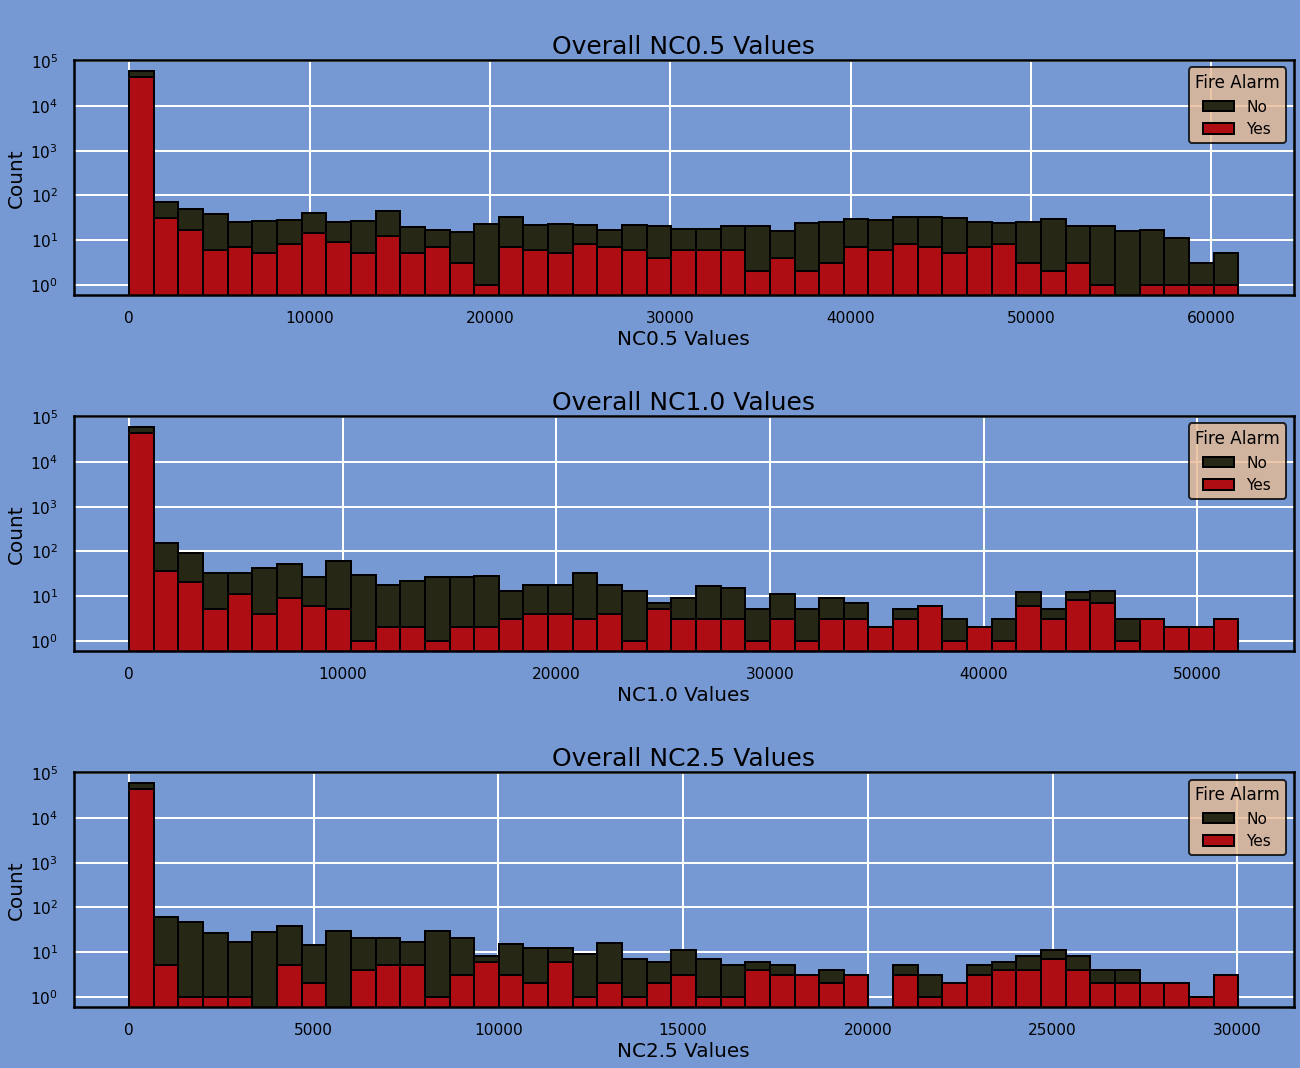

In [ ]:
print(f"Let's have a look on the distribution of the concentration of particulate matter values :")
_, axs = plt.subplots(3,1,figsize=(20,16), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="NC0.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall NC0.5 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("NC0.5 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="NC1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall NC1.0 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("NC1.0 Values",fontsize=20)
axs[1].set_yscale("log")

sns.histplot(data=data,x="NC2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[2],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[2].set_title("\nOverall NC2.5 Values",fontsize=25)
axs[2].set_ylabel("Count",fontsize=20)
axs[2].set_xlabel("NC2.5 Values",fontsize=20)
axs[2].set_yscale("log")

plt.show()

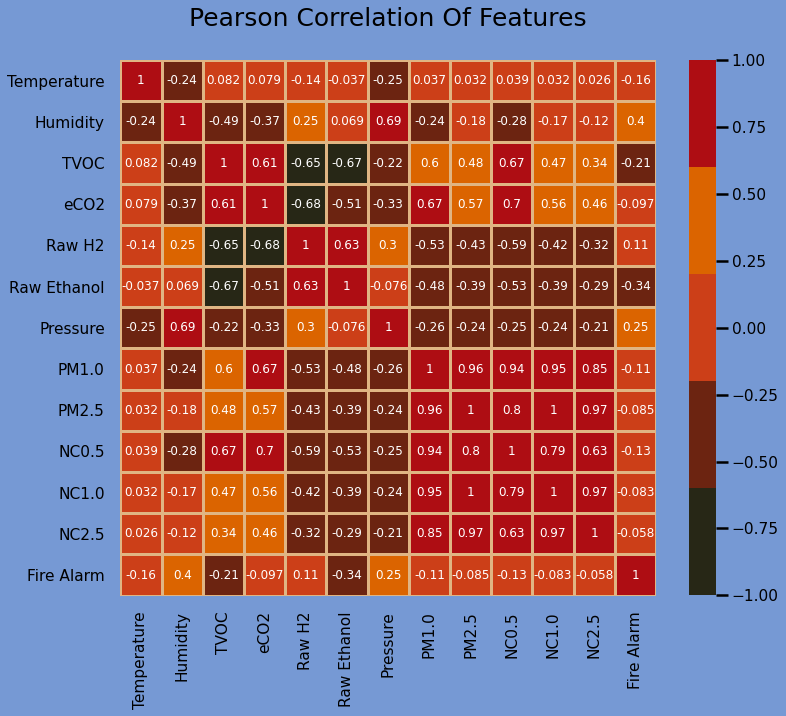

In [ ]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(12, 12))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
x = data.drop(["Fire Alarm"],axis =1)
y = data["Fire Alarm"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (50104, 12), (50104,)
Shape of testing data : (12526, 12), (12526,)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[2731  863]
 [ 447 8485]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3594
           1       0.91      0.95      0.93      8932

    accuracy                           0.90     12526
   macro avg       0.88      0.85      0.87     12526
weighted avg       0.89      0.90      0.89     12526


The Accuracy of Logistic Regression is 89.54 %


In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 870 2724]
 [ 236 8696]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.24      0.37      3594
           1       0.76      0.97      0.85      8932

    accuracy                           0.76     12526
   macro avg       0.77      0.61      0.61     12526
weighted avg       0.77      0.76      0.72     12526


The Accuracy of Gaussian Naive Bayes is 76.37 %


In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[2355 1239]
 [ 241 8691]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      3594
           1       0.88      0.97      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.89      0.81      0.84     12526
weighted avg       0.88      0.88      0.88     12526


The Accuracy of Bernoulli Naive Bayes is 88.18 %


In [ ]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[2949  645]
 [  52 8880]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3594
           1       0.93      0.99      0.96      8932

    accuracy                           0.94     12526
   macro avg       0.96      0.91      0.93     12526
weighted avg       0.95      0.94      0.94     12526


The Accuracy of Support Vector Machine is 94.44 %


In [ ]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[3594    0]
 [   0 8932]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of Random Forest Classifier is 100.0 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[3592    2]
 [   7 8925]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of K Nearest Neighbors Classifier is 99.93 %


In [ ]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[3593    1]
 [   0 8932]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of Extreme Gradient Boosting Classifier is 99.99 %


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-traina

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
783/783 [==============================] - 8s 7ms/step - loss: 0.7794 - accuracy: 0.8976 - val_loss: 0.3093 - val_accuracy: 0.9433
Epoch 2/150
783/783 [==============================] - 6s 7ms/step - loss: 0.2894 - accuracy: 0.9519 - val_loss: 0.2667 - val_accuracy: 0.9581
Epoch 3/150
783/783 [==============================] - 5s 6ms/step - loss: 0.2479 - accuracy: 0.9615 - val_loss: 0.2220 - val_accuracy: 0.9679
Epoch 4/150
783/783 [==============================] - 2s 3ms/step - loss: 0.2214 - accuracy: 0.9638 - val_loss: 0.2035 - val_accuracy: 0.9669
Epoch 5/150
783/783 [==============================] - 3s 4ms/step - loss: 0.2055 - accuracy: 0.9665 - val_loss: 0.1920 - val_accuracy: 0.9685
Epoch 6/150
783/783 [==============================] - 4s 5ms/step - loss: 0.1964 - accuracy: 0.9672 - val_loss: 0.1852 - val_accuracy: 0.9679
Epoch 7/150
783/783 [==============================] - 3s 4ms/step - loss: 0.1912 - accuracy: 0.9675 - val_loss: 0.1821 - val_accuracy: 0.9691

Let's have a look on the performance of neural network architecture :


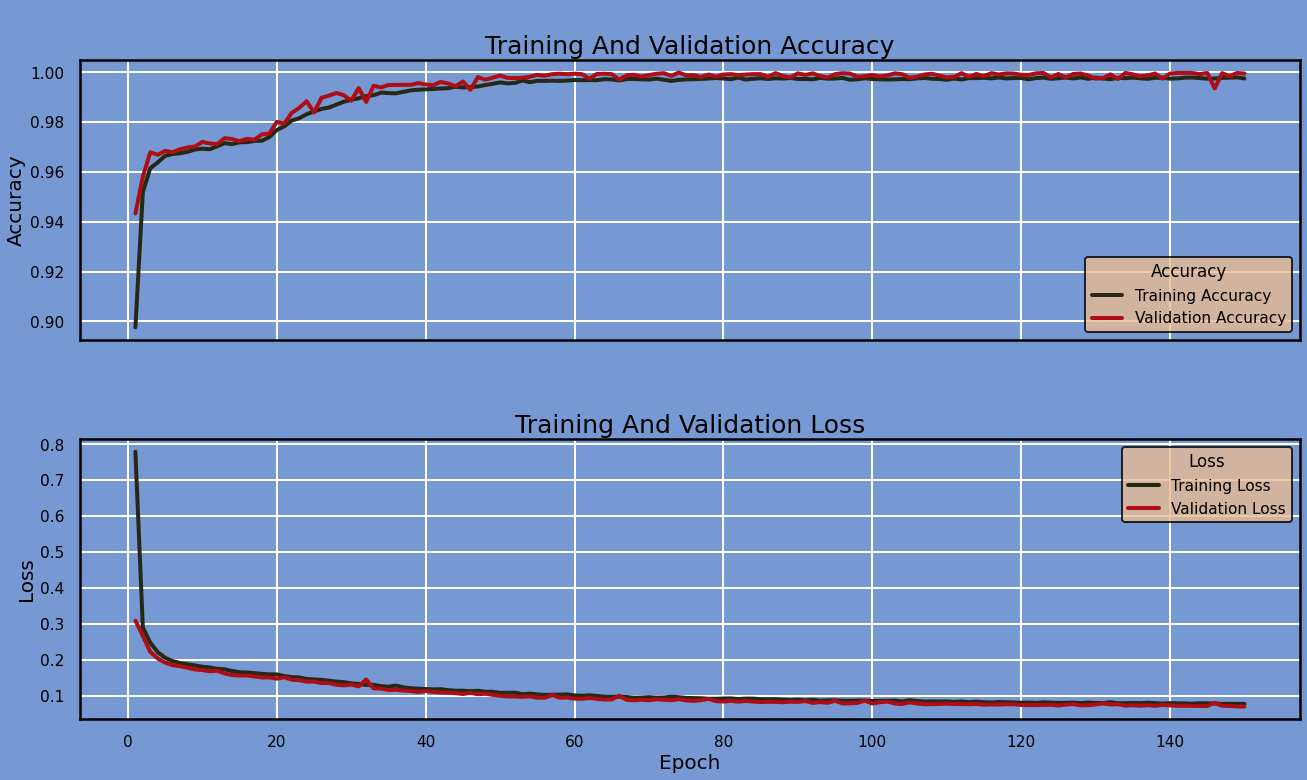

In [ ]:
# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

performance = pd.DataFrame(history.history)
performance["Epoch"] = range(1,len(history.history["accuracy"])+1)    # number of epochs
performance.rename(columns={"loss": "Training Loss","accuracy": "Training Accuracy","val_loss":"Validation Loss","val_accuracy":"Validation Accuracy"}, inplace = True)


print(f"Let's have a look on the performance of neural network architecture :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharex=True)
plt.tight_layout(pad=5.0)

sns.lineplot(data=performance,x="Epoch",y="Training Accuracy",ax=axs[0],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Accuracy",ax=axs[0],color=palette[2],alpha=1,linewidth=4)
axs[0].set_title("\nTraining And Validation Accuracy",fontsize=25)
axs[0].set_ylabel("Accuracy",fontsize=20)
axs[0].set_xlabel("Epoch",fontsize=20)
axs[0].legend(["Training Accuracy","Validation Accuracy"],title="Accuracy")

sns.lineplot(data=performance,x="Epoch",y="Training Loss",ax=axs[1],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Loss",ax=axs[1],color=palette[2],alpha=1,linewidth=4)
axs[1].set_title("\nTraining And Validation Loss",fontsize=25)
axs[1].set_ylabel("Loss",fontsize=20)
axs[1].set_xlabel("Epoch",fontsize=20)
axs[1].legend(["Training Loss","Validation Loss"],title="Loss")

plt.show()